# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
sat = pd.read_csv('~/Documents/DSI/Week1/Projects/DC-project-1/data/sat.csv', index_col ='Unnamed: 0')
sat.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [3]:
act = pd.read_csv('~/Documents/DSI/Week1/Projects/DC-project-1/data/act.csv', index_col = 'Unnamed: 0')
act.head(5)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


##### 2. Print the first ten rows of each dataframe.

In [5]:
sat.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [6]:
act.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


##### 3. Describe in words what each variable (column) is.

The participation column represents the participating rates of the class of 2017 for the SAT and ACT college entrance examinations.

The English ACT column refers to the average scores of each state for the English portion of the ACT test. The math ACT column refers to the average scores of each state for the Math section of the ACT examination. The Science ACT column refers to the average score of each state for the Science section of the ACT examination. The composite ACT column refers to the average of the 4 sections of the ACT test. 

The Evidence-Based Reading and Writing section refers to the average score of each state for the verbal section of the SAT examination. The Math SAT column refers to the average score of each state for that particular section of the SAT examination. 

##### 4. Does the data look complete? Are there any obvious issues with the observations?

Both of the data sets look quite broad. It seems to be taking a "holistic" view of the stats for both tests from each test. Test scores could vary among districts, cities, municipalities, etc. I'm going to assume that the scores are average scores. It is not too obvious that they are. It would be nice to see test scores from different districts or
divide each state with "equal" populations?

### 5. Print the types of each column.

In [8]:
act.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [9]:
sat.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

I have reassigned the Participation columns to a float in case I would like to conduct mathematics operations with the percentages. 

In [4]:
sat['Participation'] = sat['Participation'].replace('%','',regex=True).astype('float')/100
sat.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [5]:
act['Participation'] = act['Participation'].replace('%','',regex=True).astype('float')/100
act.head(5)

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [6]:
sat.set_index('State')['Math'].to_dict() ##credit: Ken Yale

{'Alabama': 572,
 'Alaska': 533,
 'Arizona': 553,
 'Arkansas': 594,
 'California': 524,
 'Colorado': 595,
 'Connecticut': 512,
 'Delaware': 492,
 'District of Columbia': 468,
 'Florida': 497,
 'Georgia': 515,
 'Hawaii': 541,
 'Idaho': 493,
 'Illinois': 556,
 'Indiana': 532,
 'Iowa': 635,
 'Kansas': 628,
 'Kentucky': 616,
 'Louisiana': 586,
 'Maine': 499,
 'Maryland': 52,
 'Massachusetts': 551,
 'Michigan': 495,
 'Minnesota': 651,
 'Mississippi': 607,
 'Missouri': 631,
 'Montana': 591,
 'Nebraska': 625,
 'Nevada': 553,
 'New Hampshire': 520,
 'New Jersey': 526,
 'New Mexico': 561,
 'New York': 523,
 'North Carolina': 535,
 'North Dakota': 621,
 'Ohio': 570,
 'Oklahoma': 517,
 'Oregon': 548,
 'Pennsylvania': 531,
 'Rhode Island': 524,
 'South Carolina': 521,
 'South Dakota': 603,
 'Tennessee': 604,
 'Texas': 507,
 'Utah': 614,
 'Vermont': 551,
 'Virginia': 541,
 'Washington': 534,
 'West Virginia': 528,
 'Wisconsin': 649,
 'Wyoming': 604}

In [7]:
sat.set_index('State')['Evidence-Based Reading and Writing'].to_dict()

{'Alabama': 593,
 'Alaska': 547,
 'Arizona': 563,
 'Arkansas': 614,
 'California': 531,
 'Colorado': 606,
 'Connecticut': 530,
 'Delaware': 503,
 'District of Columbia': 482,
 'Florida': 520,
 'Georgia': 535,
 'Hawaii': 544,
 'Idaho': 513,
 'Illinois': 559,
 'Indiana': 542,
 'Iowa': 641,
 'Kansas': 632,
 'Kentucky': 631,
 'Louisiana': 611,
 'Maine': 513,
 'Maryland': 536,
 'Massachusetts': 555,
 'Michigan': 509,
 'Minnesota': 644,
 'Mississippi': 634,
 'Missouri': 640,
 'Montana': 605,
 'Nebraska': 629,
 'Nevada': 563,
 'New Hampshire': 532,
 'New Jersey': 530,
 'New Mexico': 577,
 'New York': 528,
 'North Carolina': 546,
 'North Dakota': 635,
 'Ohio': 578,
 'Oklahoma': 530,
 'Oregon': 560,
 'Pennsylvania': 540,
 'Rhode Island': 539,
 'South Carolina': 543,
 'South Dakota': 612,
 'Tennessee': 623,
 'Texas': 513,
 'Utah': 624,
 'Vermont': 562,
 'Virginia': 561,
 'Washington': 541,
 'West Virginia': 558,
 'Wisconsin': 642,
 'Wyoming': 626}

In [8]:
sat.set_index('State')['Total'].to_dict()

{'Alabama': 1165,
 'Alaska': 1080,
 'Arizona': 1116,
 'Arkansas': 1208,
 'California': 1055,
 'Colorado': 1201,
 'Connecticut': 1041,
 'Delaware': 996,
 'District of Columbia': 950,
 'Florida': 1017,
 'Georgia': 1050,
 'Hawaii': 1085,
 'Idaho': 1005,
 'Illinois': 1115,
 'Indiana': 1074,
 'Iowa': 1275,
 'Kansas': 1260,
 'Kentucky': 1247,
 'Louisiana': 1198,
 'Maine': 1012,
 'Maryland': 1060,
 'Massachusetts': 1107,
 'Michigan': 1005,
 'Minnesota': 1295,
 'Mississippi': 1242,
 'Missouri': 1271,
 'Montana': 1196,
 'Nebraska': 1253,
 'Nevada': 1116,
 'New Hampshire': 1052,
 'New Jersey': 1056,
 'New Mexico': 1138,
 'New York': 1052,
 'North Carolina': 1081,
 'North Dakota': 1256,
 'Ohio': 1149,
 'Oklahoma': 1047,
 'Oregon': 1108,
 'Pennsylvania': 1071,
 'Rhode Island': 1062,
 'South Carolina': 1064,
 'South Dakota': 1216,
 'Tennessee': 1228,
 'Texas': 1020,
 'Utah': 1238,
 'Vermont': 1114,
 'Virginia': 1102,
 'Washington': 1075,
 'West Virginia': 1086,
 'Wisconsin': 1291,
 'Wyoming': 1230}

#### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [9]:
col_names = sat.columns
values = sat.values[:,:]

new_dict = {k:v for k,v in zip(col_names, values)}
new_dict

{'Evidence-Based Reading and Writing': array(['Arizona', 0.3, 563, 553, 1116], dtype=object),
 'Math': array(['Arkansas', 0.03, 614, 594, 1208], dtype=object),
 'Participation': array(['Alaska', 0.38, 547, 533, 1080], dtype=object),
 'State': array(['Alabama', 0.05, 593, 572, 1165], dtype=object),
 'Total': array(['California', 0.53, 531, 524, 1055], dtype=object)}

##### 9. Merge the dataframes on the state column.

In [10]:
SAT_ACT = pd.merge(sat, act, how='left', on='State', suffixes=('SAT','ACT'))
SAT_ACT.head(5)

,State,ParticipationSAT,Evidence-Based Reading and Writing,MathSAT,Total,ParticipationACT,English,MathACT,Reading,Science,Composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [11]:
SAT_ACT = SAT_ACT.rename(columns={'ParticipationACT': 'Participation_ACT', 'ParticipationSAT': 'Participation_SAT'})
SAT_ACT.head(5)

,State,Participation_SAT,Evidence-Based Reading and Writing,MathSAT,Total,Participation_ACT,English,MathACT,Reading,Science,Composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [12]:
SAT_ACT = SAT_ACT.rename(columns={'MathSAT': 'Math_SAT', 'MathACT': 'Math_ACT'})
SAT_ACT.head(5)

,State,Participation_SAT,Evidence-Based Reading and Writing,Math_SAT,Total,Participation_ACT,English,Math_ACT,Reading,Science,Composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [13]:
SAT_ACT = SAT_ACT.rename(columns = {'Evidence-Based Reading and Writing': 'Evidence-Based Reading and Writing_SAT', 'Total': 'Total_SAT', 'English': 'English_ACT', 'Reading': 'Reading_ACT', 'Science': 'Science_ACT', 'Composite': 'Composite_ACT'})
SAT_ACT.head(5)

,State,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [14]:
sat_act_agg = SAT_ACT.agg({'Participation_SAT':['min','max'], ##Hector Ian Martinez
             'Evidence-Based Reading and Writing_SAT':['min','max'],
             'Math_SAT':['min','max'],
            'Total_SAT':['min', 'max'],
            'Participation_ACT':['min','max'],
            'English_ACT':['min','max'],
             'Math_ACT':['min','max'],
             'Reading_ACT':['min','max'],
             'Science_ACT':['min','max'],
             'Composite_ACT':['min','max']
            })
sat_act_agg

##This was done to collect all minmium and maximum values of each numeric column in the data frame. 

,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
min,0.02,482,52,950,0.08,16.3,18.0,18.1,2.3,17.8
max,1.00,644,651,1295,1.00,25.5,25.3,26.0,24.9,25.5


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [15]:
def standard_deviation(lst): ##credit: Hector Ian Martinez
    '''We want to calculate the standard deviation of the list'''
    mean_value = np.mean(lst) 
    inside_root = sum([(i-mean_value)**2 for i in lst]) / len(lst)
    return np.sqrt(inside_root)

In [16]:
sd = SAT_ACT.iloc[:,1:].apply(standard_deviation) ##Micheal Schillawski
sd ##this applies to all relevant values of each column that needs to be included to calcluate the standard deviation

Participation_SAT                          0.349291
Evidence-Based Reading and Writing_SAT    45.216970
Math_SAT                                  84.072555
Total_SAT                                 91.583511
Participation_ACT                          0.318242
English_ACT                                2.330488
Math_ACT                                   1.962462
Reading_ACT                                2.046903
Science_ACT                                3.151108
Composite_ACT                              2.000786
dtype: float64

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [17]:
sd = SAT_ACT.append(sd, ignore_index=True)
sd 

,State,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
0,Alabama,0.050000,593.00000,572.000000,1165.000000,1.000000,18.900000,18.400000,19.700000,19.400000,19.200000
1,Alaska,0.380000,547.00000,533.000000,1080.000000,0.650000,18.700000,19.800000,20.400000,19.900000,19.800000
2,Arizona,0.300000,563.00000,553.000000,1116.000000,0.620000,18.600000,19.800000,20.100000,19.800000,19.700000
3,Arkansas,0.030000,614.00000,594.000000,1208.000000,1.000000,18.900000,19.000000,19.700000,19.500000,19.400000
4,California,0.530000,531.00000,524.000000,1055.000000,0.310000,22.500000,22.700000,23.100000,22.200000,22.800000
5,Colorado,0.110000,606.00000,595.000000,1201.000000,1.000000,20.100000,20.300000,21.200000,20.900000,20.800000
6,Connecticut,1.000000,530.00000,512.000000,1041.000000,0.310000,25.500000,24.600000,25.600000,24.600000,25.200000
7,Delaware,1.000000,503.00000,492.000000,996.000000,0.180000,24.100000,23.400000,24.800000,23.600000,24.100000
8,District of Columbia,1.000000,482.00000,468.000000,950.000000,0.320000,24.400000,23.500000,24.900000,23.500000,24.200000
9,Florida,0.830000,520.00000,497.000000,1017.000000,0.730000,19.000000,19.400000,21.000000,19.400000,19.800000


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [18]:
SAT_ACT.sort_values(by=['Participation_SAT'], ascending=False)[0:50] ##the 0:50 bracket is done to avoid including the standard deviation row

,State,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3
12,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,22.3
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8
21,Massachusetts,0.76,555,551,1107,0.29,25.4,25.3,25.9,24.7,25.4
39,Rhode Island,0.71,539,524,1062,0.21,24.0,23.3,24.7,23.4,24.0


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [19]:
Participation_Total = SAT_ACT[(SAT_ACT['Participation_SAT'] > 0.50) & (SAT_ACT['Total_SAT'] > 1100)][0:50]
Participation_Total 

,State,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
21,Massachusetts,0.76,555,551,1107,0.29,25.4,25.3,25.9,24.7,25.4
45,Vermont,0.60,562,551,1114,0.29,23.3,23.1,24.4,23.2,23.6
46,Virginia,0.65,561,541,1102,0.29,23.5,23.3,24.6,23.5,23.8


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [20]:
np.median(SAT_ACT['Participation_SAT'][0:50]) ##I calculated the median and mean for each distribution to get
#an idea of what the distribution's shape such as left or right skewedd

0.40500000000000003

In [21]:
SAT_ACT.Participation_SAT.iloc[0:50].mean()

0.4054

Standard deviation = 0.350 (taken from sd from Question 12)

<function matplotlib.pyplot.show>

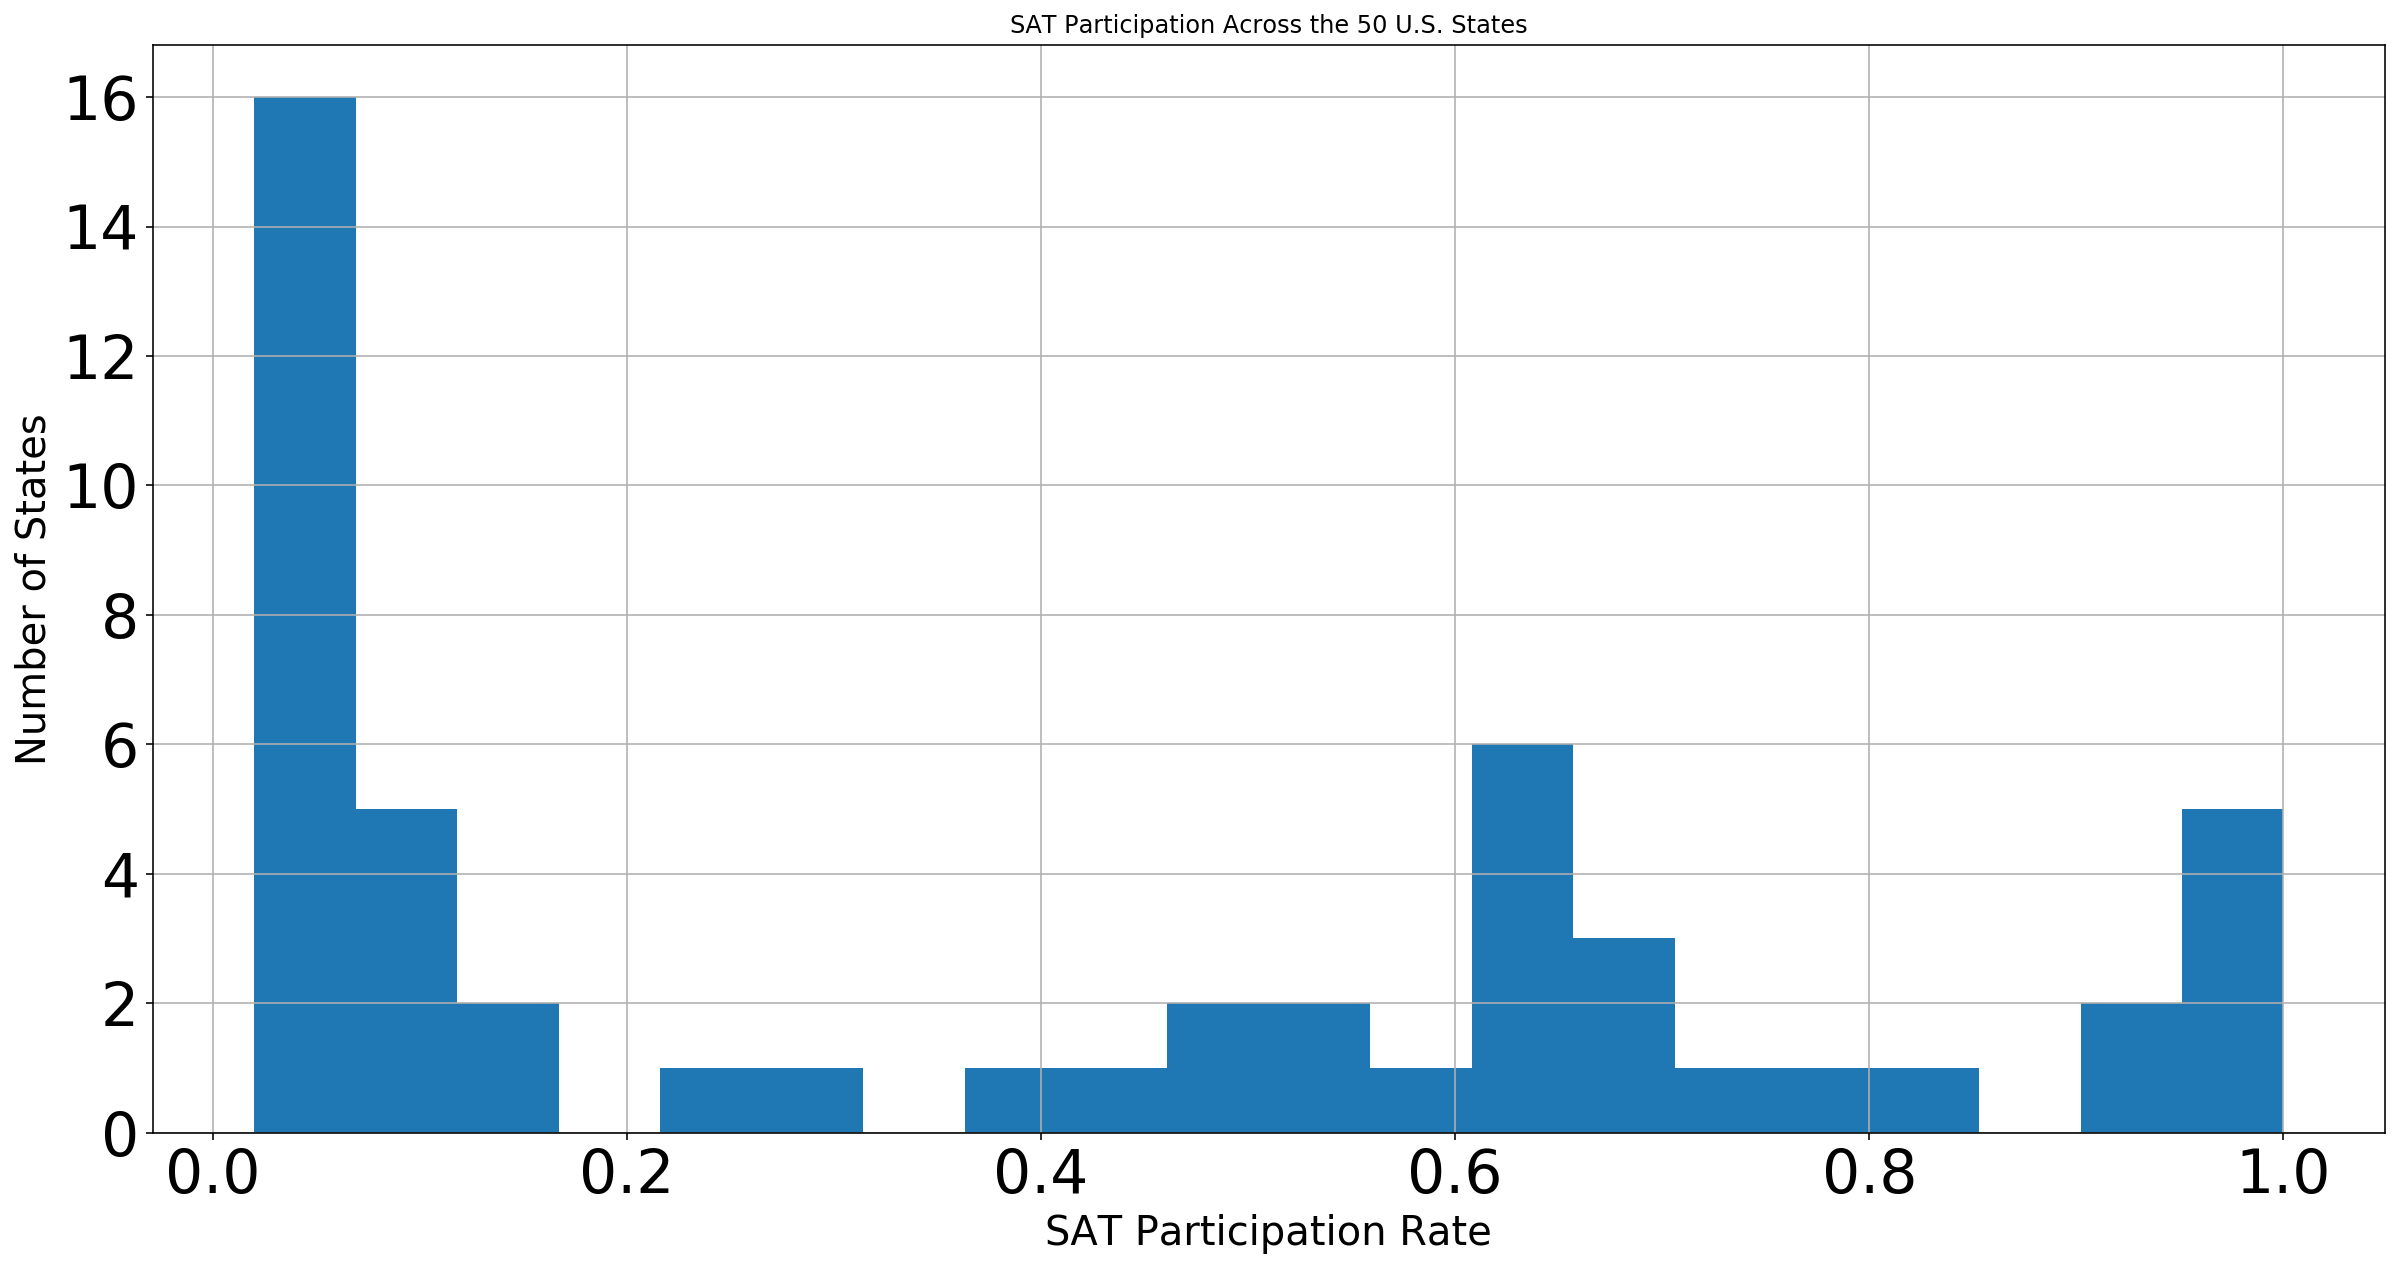

In [22]:
SAT_ACT.hist(column='Participation_SAT', xlabelsize=30, ylabelsize=30, figsize=(20,10), bins=20)[0:50]
plt.xlabel('SAT Participation Rate', fontsize=20)
plt.ylabel('Number of States', fontsize=20)
plt.title('SAT Participation Across the 50 U.S. States')
plt.show

In [23]:
np.median(SAT_ACT['Participation_ACT'][0:50])

0.67999999999999994

In [24]:
SAT_ACT.Participation_ACT.iloc[0:50].mean()

0.6455999999999998

Standard deviation = 0.318 (taken from sd from Question 12)

<function matplotlib.pyplot.show>

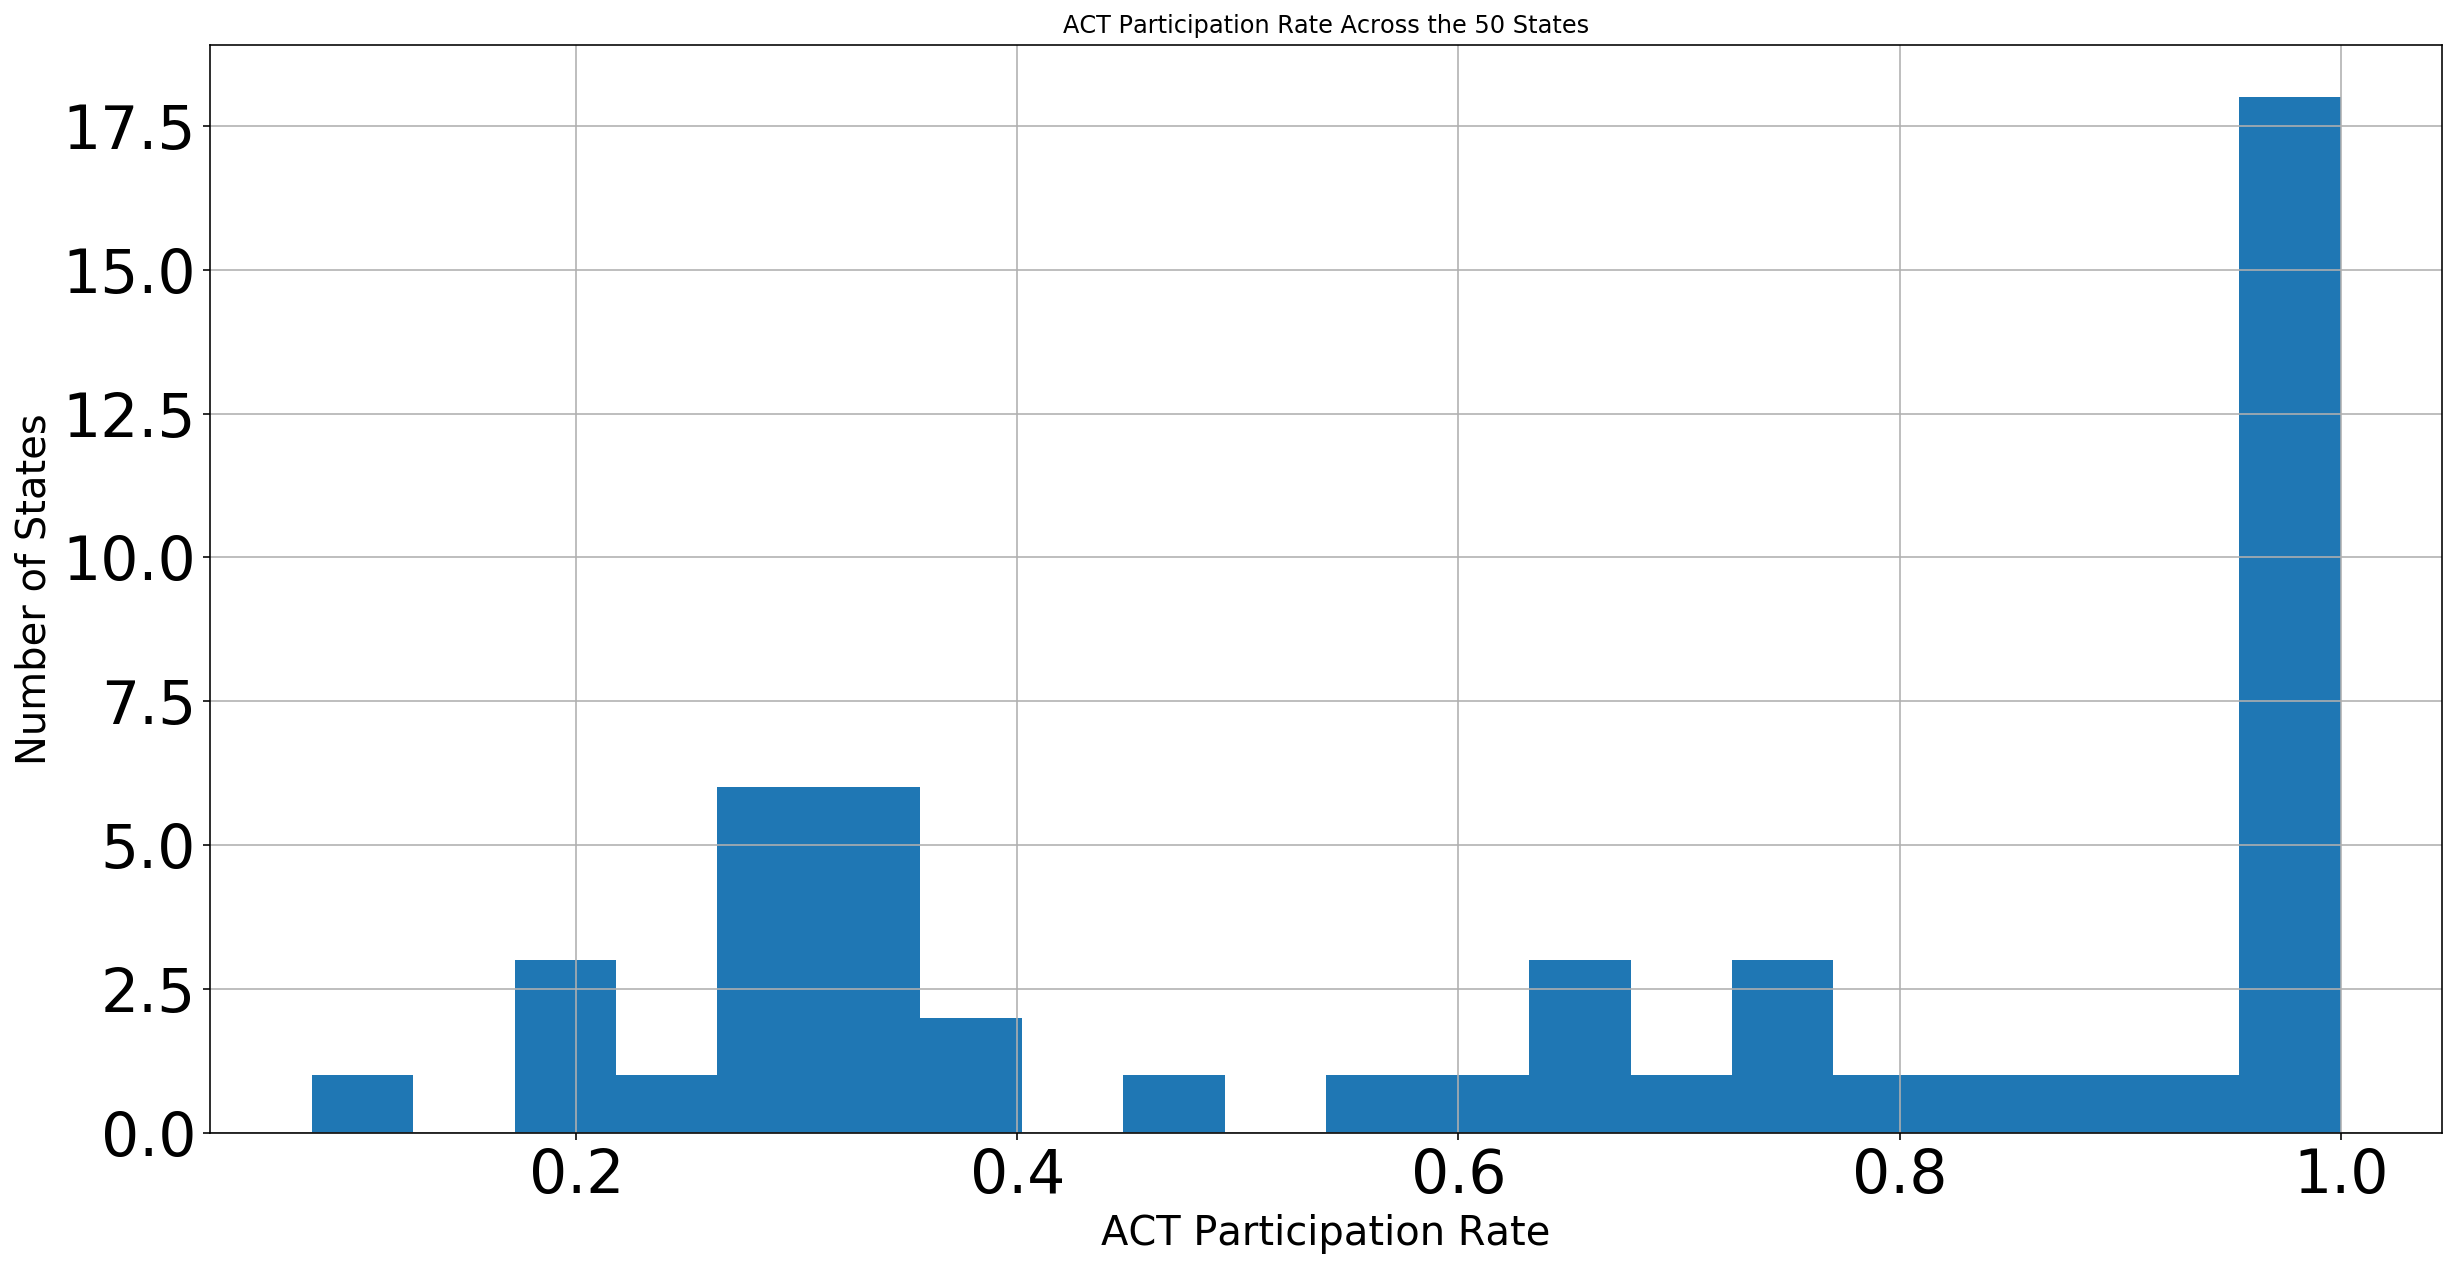

In [25]:
SAT_ACT.hist(column='Participation_ACT',xlabelsize=30, ylabelsize=30, figsize=(20,10), bins=20)[0:50]
plt.xlabel('ACT Participation Rate', fontsize=20)
plt.ylabel('Number of States', fontsize=20)
plt.title('ACT Participation Rate Across the 50 States')
plt.show

##### 17. Plot the Math(s) distributions from both data sets.

In [26]:
np.median(SAT_ACT['Math_SAT'][0:50])

544.5

In [27]:
SAT_ACT.Math_SAT.iloc[0:50].mean()

546.5

Standard deviation = 84.073 (taken from sd from Question 12)

Text(0.5,1,'SAT Math Scores Across the 50 States')

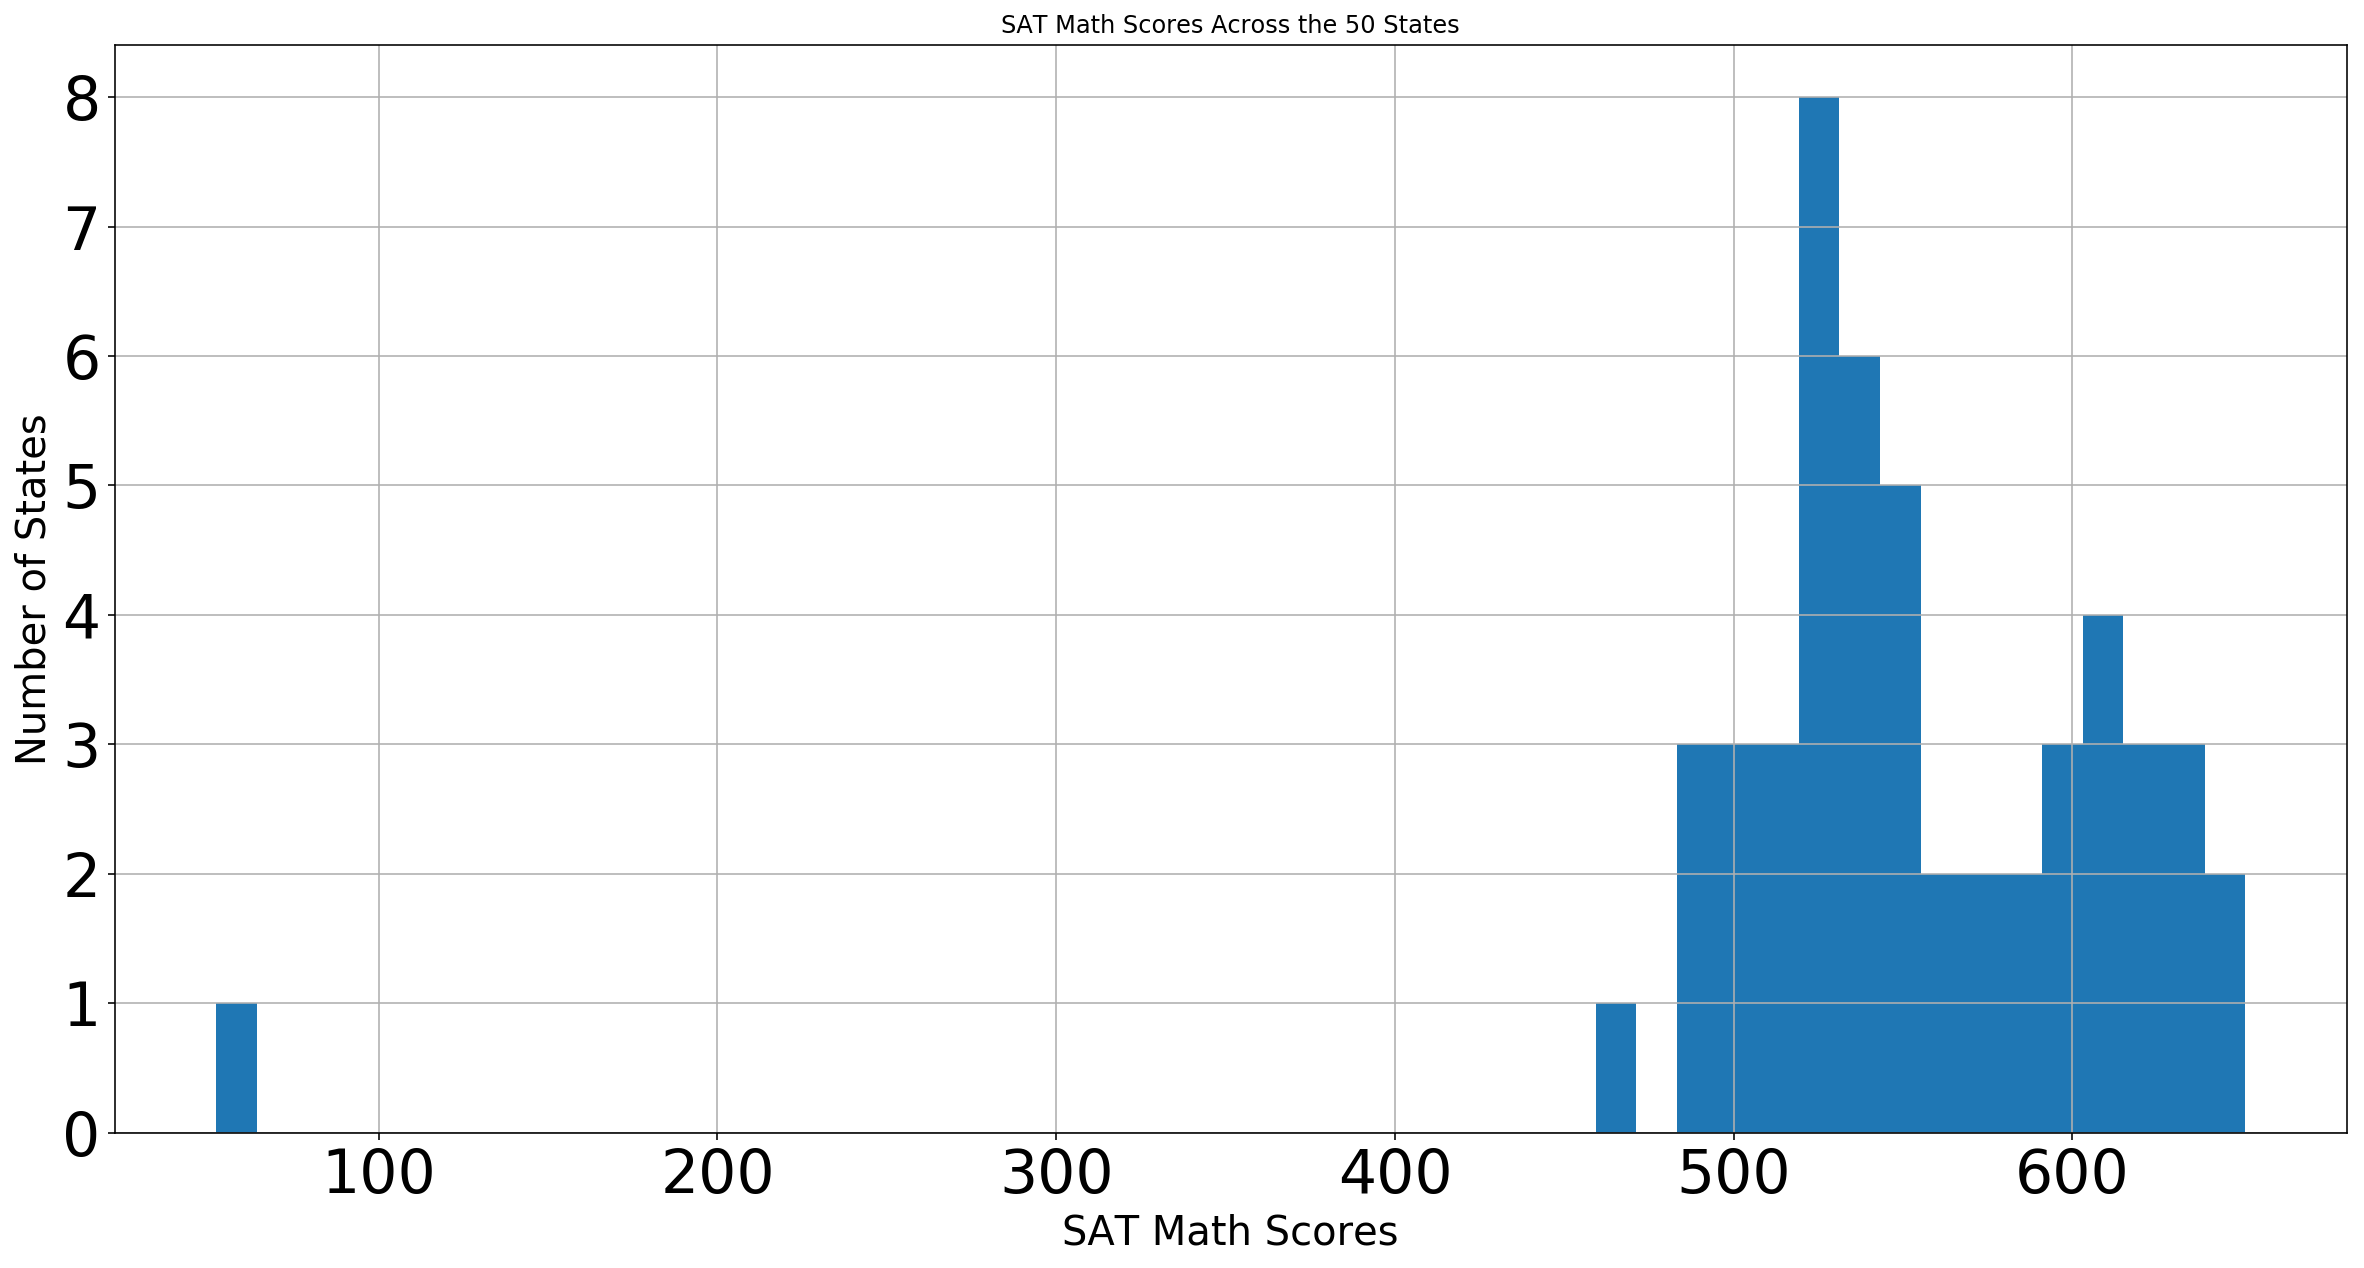

In [29]:
SAT_ACT.hist(column='Math_SAT', xlabelsize=30, ylabelsize=30, figsize=(20,10), bins=50)[0:50]
plt.xlabel('SAT Math Scores', fontsize=20)
plt.ylabel('Number of States', fontsize=20)
plt.title('SAT Math Scores Across the 50 States')

In [33]:
np.median(SAT_ACT['Math_ACT'][0:50])

21.049999999999997

In [34]:
SAT_ACT.Math_ACT.iloc[0:50].mean()

21.21

Standard Deviation = 1.96 (taken from sd from Question 12)

Text(0.5,1,'ACT Math Scores Across the 50 States')

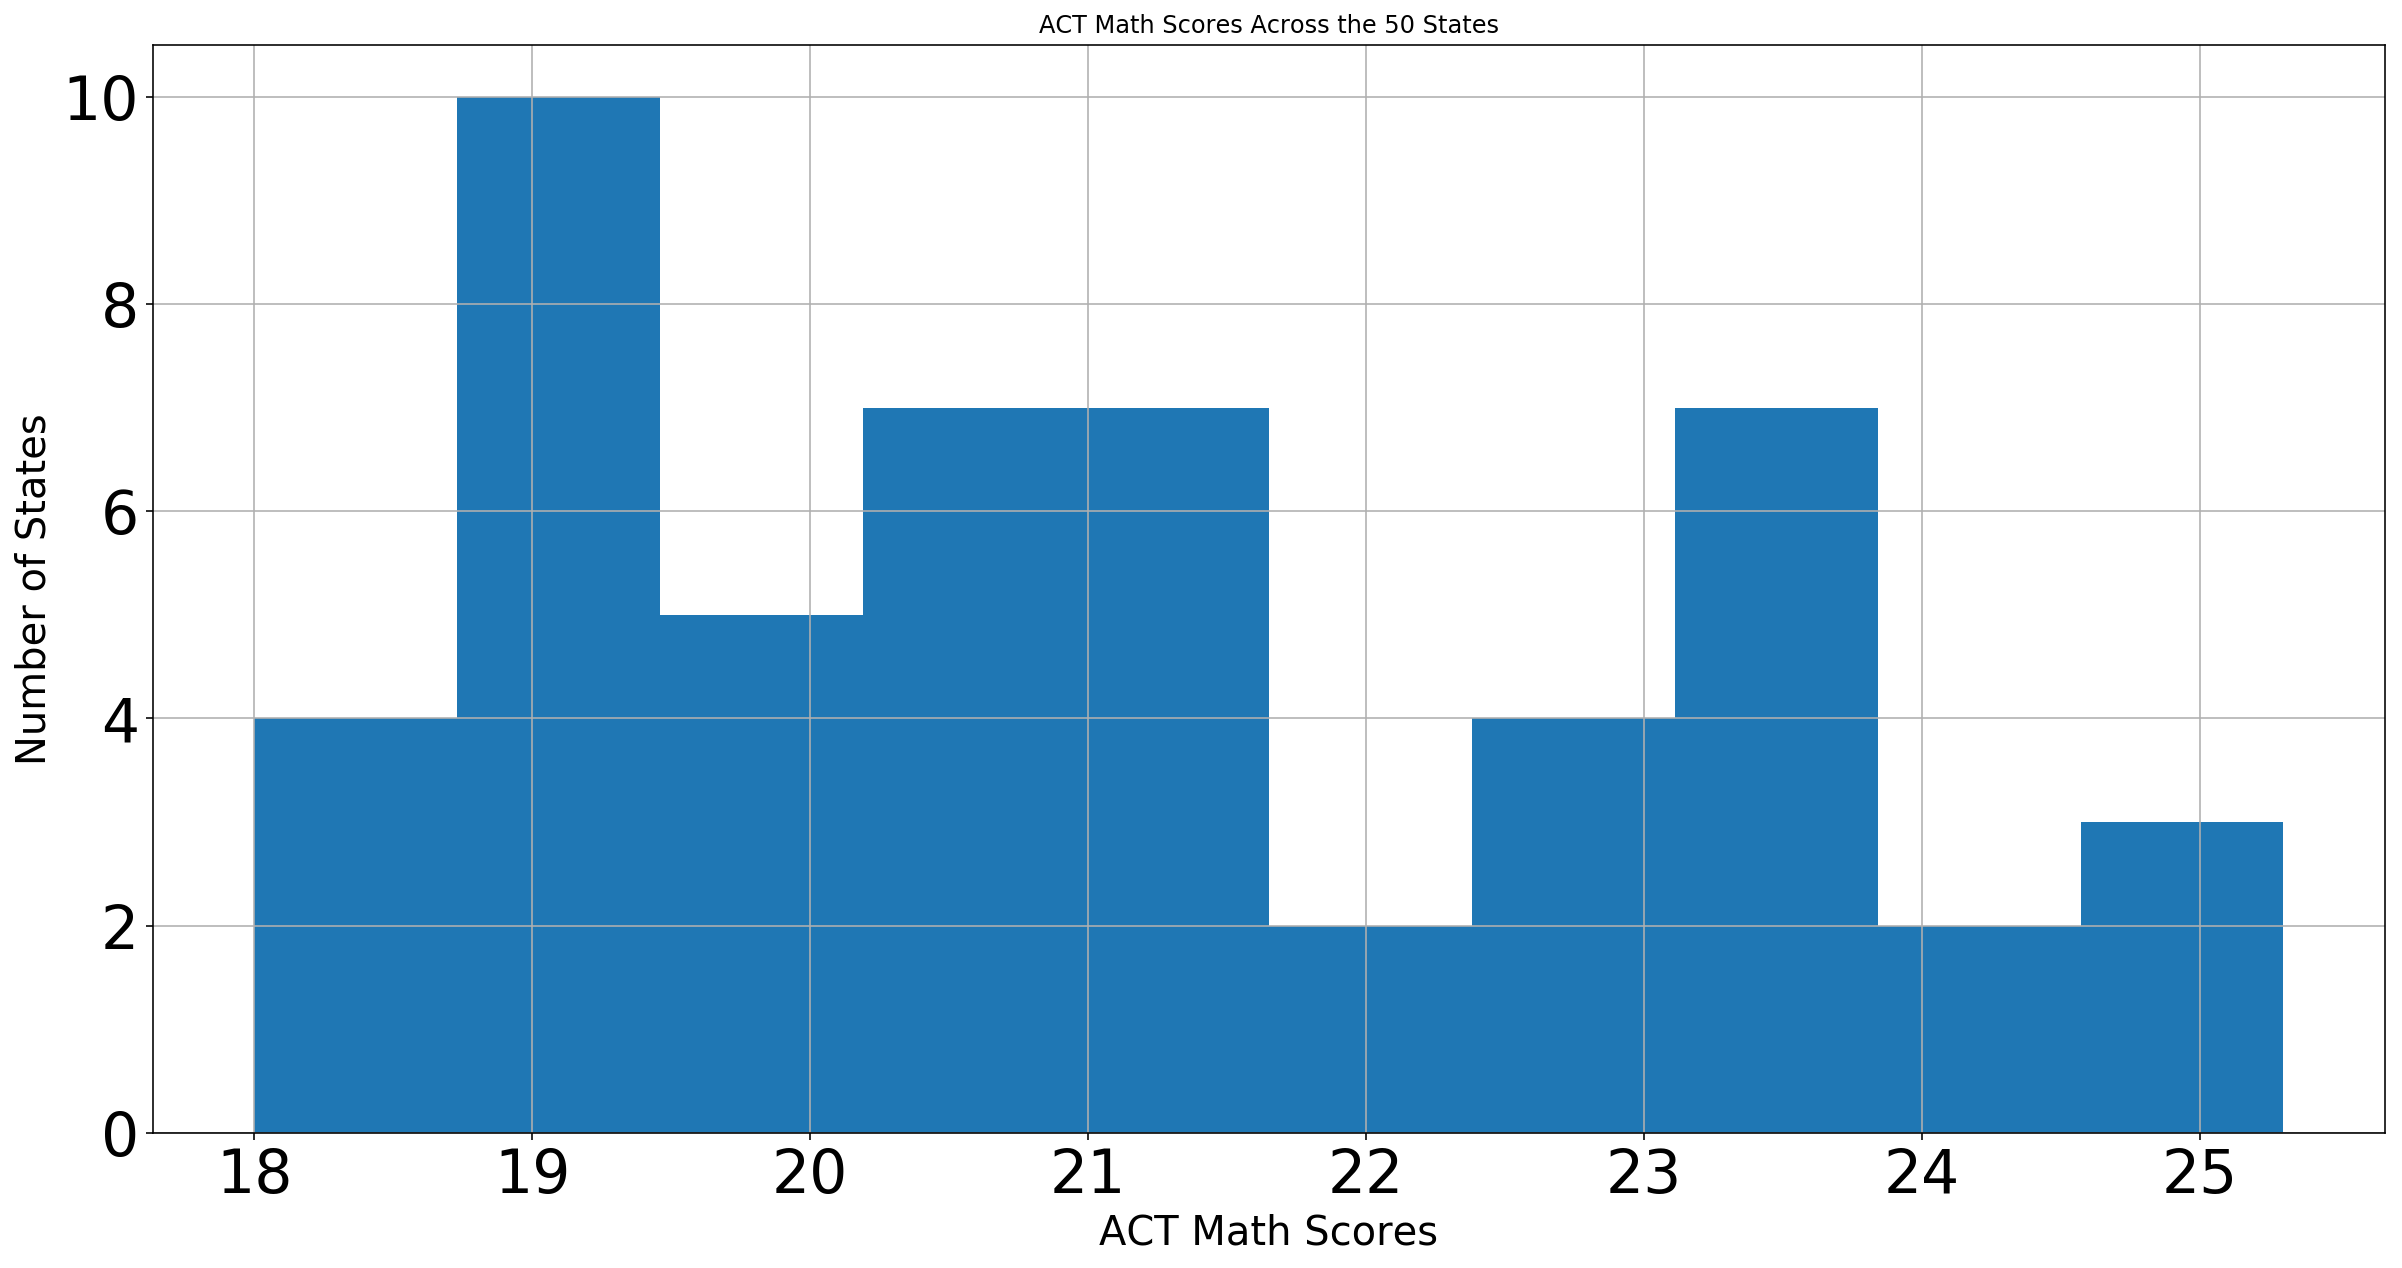

In [35]:
SAT_ACT.hist(column='Math_ACT', xlabelsize=30, ylabelsize=30, figsize=(20,10), bins=10)[0:50]
plt.xlabel('ACT Math Scores', fontsize=20)
plt.ylabel('Number of States', fontsize=20)
plt.title('ACT Math Scores Across the 50 States')

##### 18. Plot the Verbal distributions from both data sets.

In [36]:
np.median(SAT_ACT['Evidence-Based Reading and Writing_SAT'][0:50])

558.5

In [37]:
np.mean(SAT_ACT['Evidence-Based Reading and Writing_SAT'][0:50])

567.98

Standard deviation = 45.217 (taken from sd from Question 12)

<function matplotlib.pyplot.show>

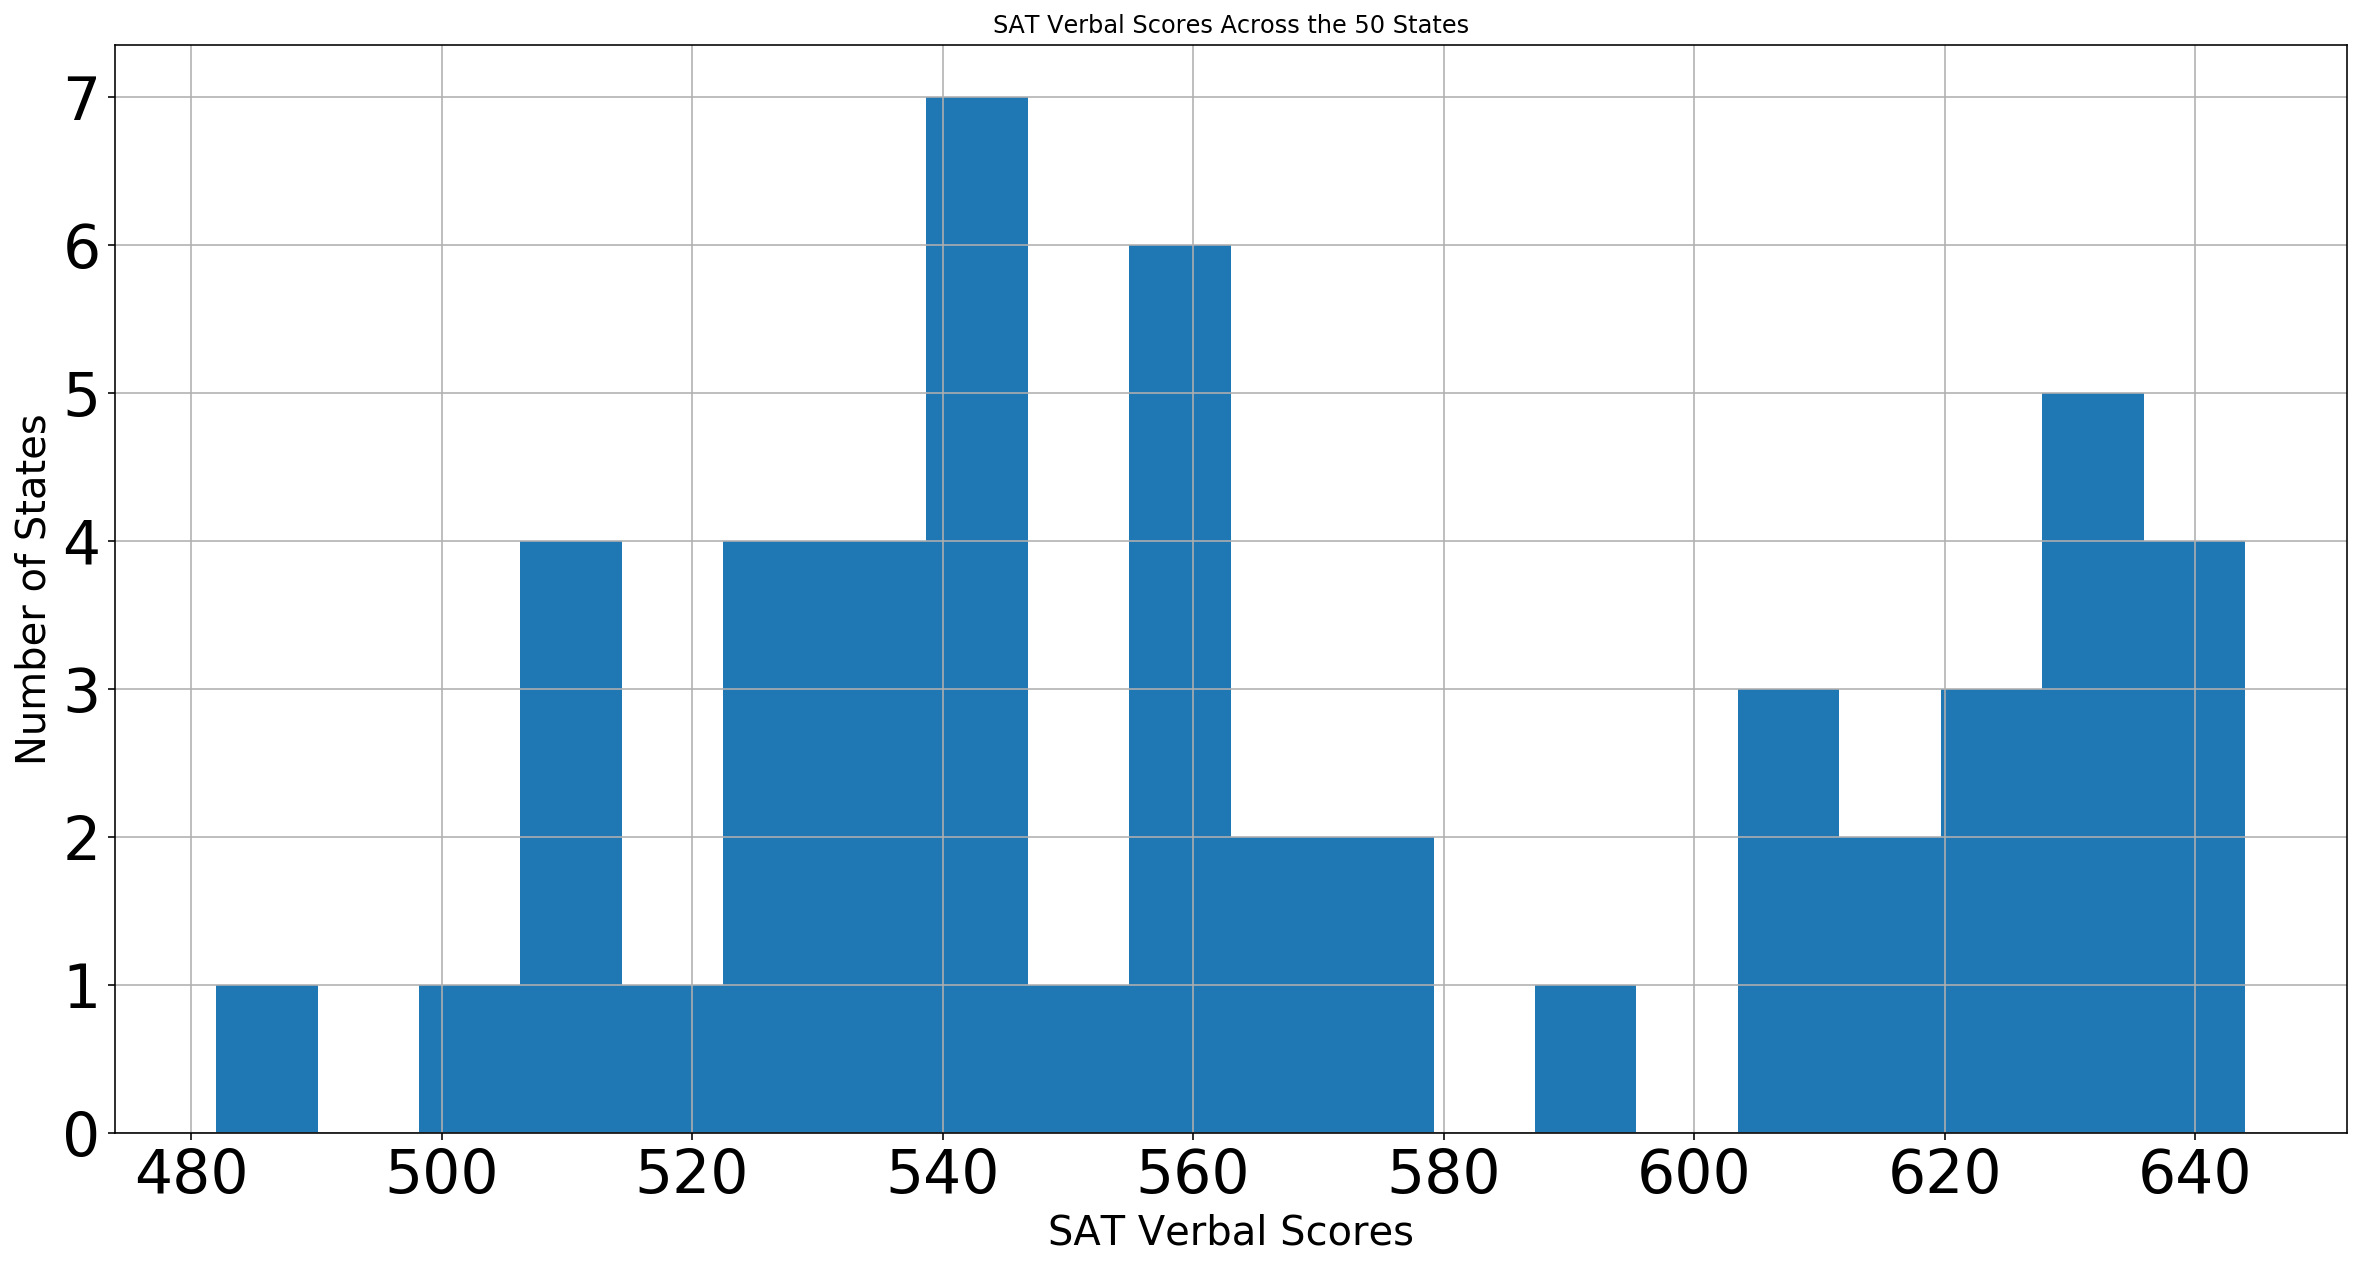

In [38]:
SAT_ACT.hist(column='Evidence-Based Reading and Writing_SAT', xlabelsize=30, ylabelsize=30, figsize=(20,10), bins=20)[0:50]
plt.xlabel('SAT Verbal Scores', fontsize=20)
plt.ylabel('Number of States', fontsize=20)
plt.title('SAT Verbal Scores Across the 50 States')
plt.show

In [39]:
np.median(SAT_ACT['Reading_ACT'][0:50])

21.850000000000001

In [40]:
np.mean(SAT_ACT['Reading_ACT'][0:50])

22.037999999999997

Standard deviation = 2.05 (taken from sd from Question 12)

<function matplotlib.pyplot.show>

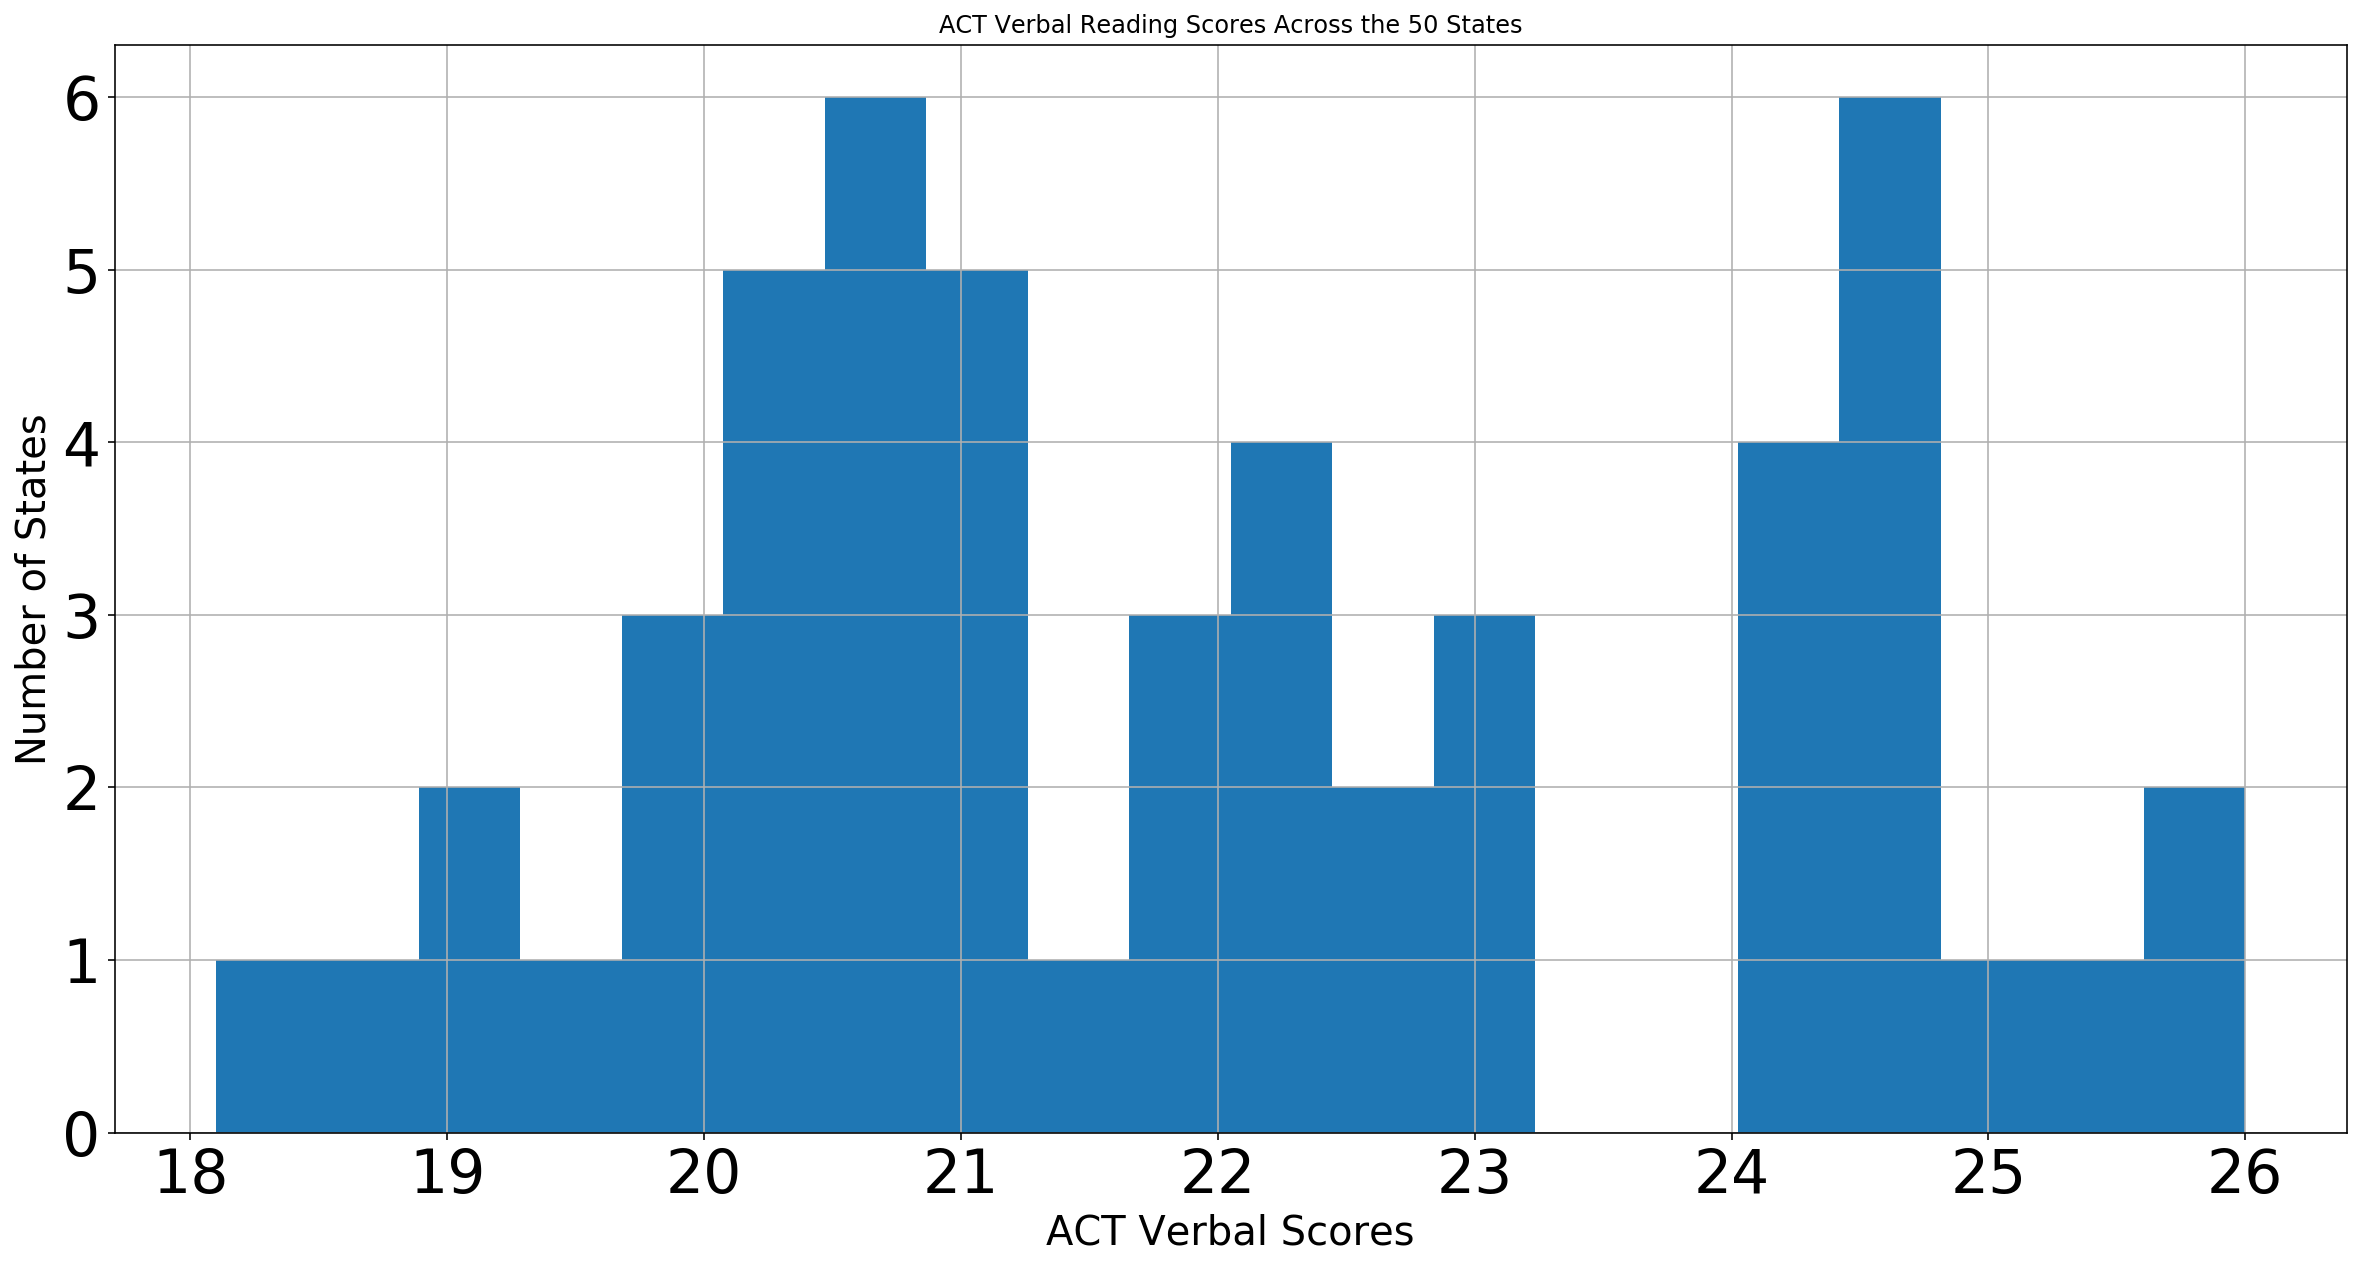

In [41]:
SAT_ACT.hist(column='Reading_ACT', xlabelsize=30, ylabelsize=30, figsize=(20,10), bins=20)
plt.xlabel('ACT Verbal Scores', fontsize=20)
plt.ylabel('Number of States', fontsize=20)
plt.title('ACT Verbal Reading Scores Across the 50 States')
plt.show

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

The most common assumption is that we assume is that the distribution is normally distributed, even though the original variables are not normally distributed.

##### 20. Does this assumption hold true for any of our columns? Which?

The assumption can be held true for any of them because their sample sizes are above 30 according to the Central Limit Theorem. 

##### 21. Plot some scatterplots examining relationships between all variables.

In [42]:
np.corrcoef(SAT_ACT['Participation_SAT'],SAT_ACT['Participation_ACT']) ##wanted to calculate the correlation
##coefficient in order to see the strength of the relationship

array([[ 1.        , -0.84123446],
       [-0.84123446,  1.        ]])

Text(0.5,1,'ACT Participation Rate vs. SAT Participation Rate')

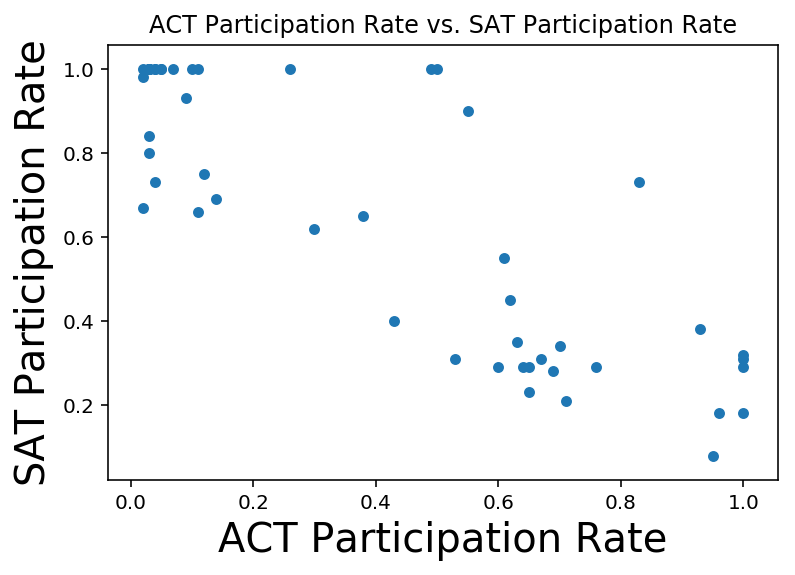

In [43]:
SAT_ACT.plot.scatter('Participation_SAT', 'Participation_ACT')
plt.xlabel('ACT Participation Rate', fontsize=20)
plt.ylabel('SAT Participation Rate', fontsize=20)
plt.title('ACT Participation Rate vs. SAT Participation Rate')

In [44]:
np.corrcoef(SAT_ACT['Total_SAT'],SAT_ACT['Composite_ACT'])

array([[ 1.        , -0.44502019],
       [-0.44502019,  1.        ]])

Text(0.5,1,'ACT Composite Scores vs. SAT Total Scores')

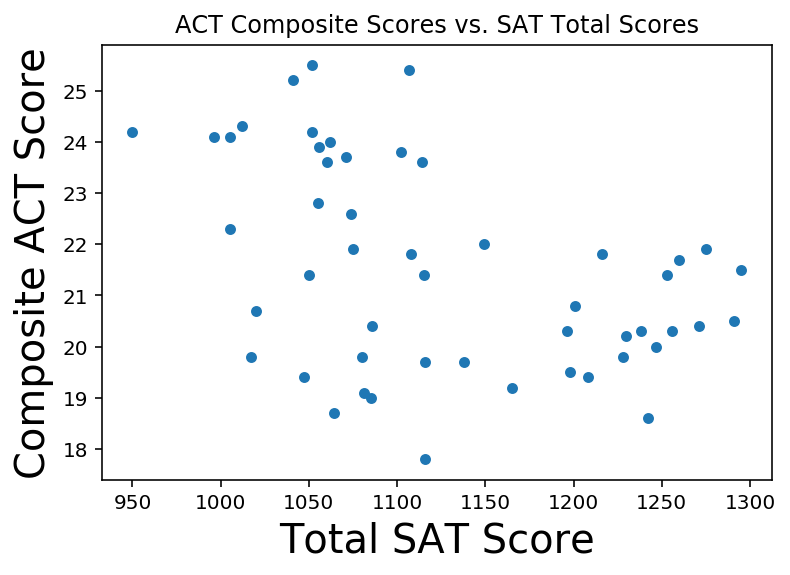

In [45]:
SAT_ACT.plot.scatter('Total_SAT', 'Composite_ACT')
plt.xlabel('Total SAT Score', fontsize=20)
plt.ylabel('Composite ACT Score', fontsize=20)
plt.title('ACT Composite Scores vs. SAT Total Scores')

In [46]:
np.corrcoef(SAT_ACT['Participation_SAT'],SAT_ACT['Total_SAT'])

array([[ 1.        , -0.86753981],
       [-0.86753981,  1.        ]])

Text(0.5,1,'SAT Participation vs. SAT Scores')

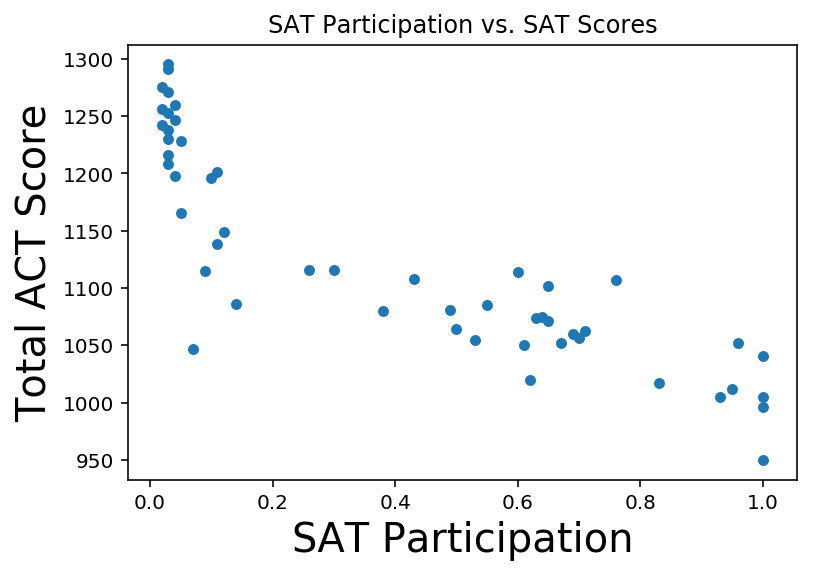

In [47]:
SAT_ACT.plot.scatter('Participation_SAT', 'Total_SAT')
plt.xlabel('SAT Participation', fontsize=20)
plt.ylabel('Total ACT Score', fontsize=20)
plt.title('SAT Participation vs. SAT Scores')

In [48]:
np.corrcoef(SAT_ACT['Participation_ACT'],SAT_ACT['Composite_ACT'])

array([[ 1.        , -0.85813416],
       [-0.85813416,  1.        ]])

Text(0.5,1,'ACT Participation vs. ACT Composite Scores')

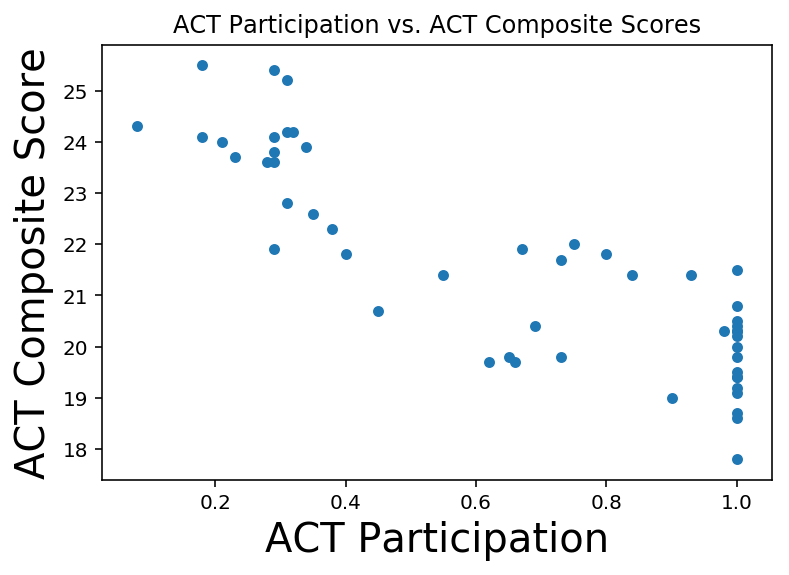

In [49]:
SAT_ACT.plot.scatter('Participation_ACT', 'Composite_ACT')
plt.xlabel('ACT Participation', fontsize=20)
plt.ylabel('ACT Composite Score', fontsize=20)
plt.title('ACT Participation vs. ACT Composite Scores')

##### 22. Are there any interesting relationships to note?

There is negative correlation between the relationship between the Total SAT score and SAT Participation and between the Composite ACT score and the ACT Participation. Also, the relationship between the composite ACT scores and the total SAT scores is a slighly negative correlation. It is not surprising that it is a weak relationship because you're comparing a total score and an average score. Since the two tests differ not just on scoring and on sections of the test, comparing an average score for both tests would probably make the correlation stronger and more reliable to use for analysis. 

##### 23. Create box plots for each variable. 

<function matplotlib.pyplot.show>

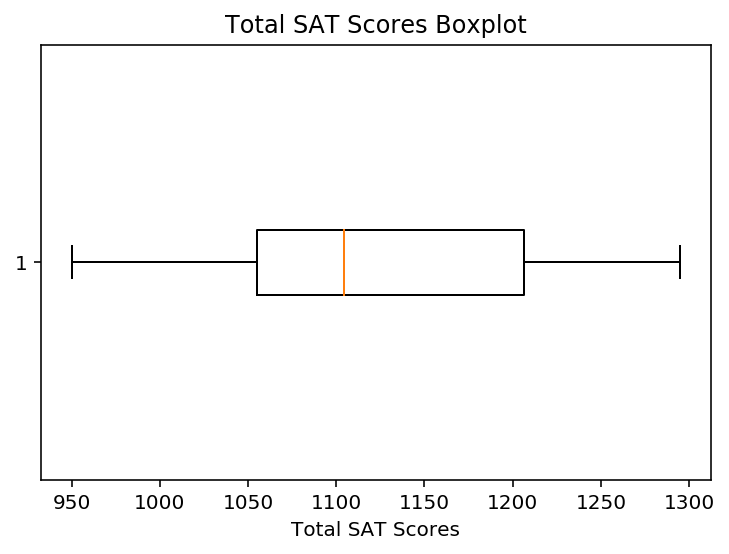

In [50]:
plt.boxplot(SAT_ACT['Total_SAT'][0:50],vert=False, whis=10.0, autorange=True)
plt.xlabel('Total SAT Scores')
plt.title('Total SAT Scores Boxplot')
plt.show

<function matplotlib.pyplot.show>

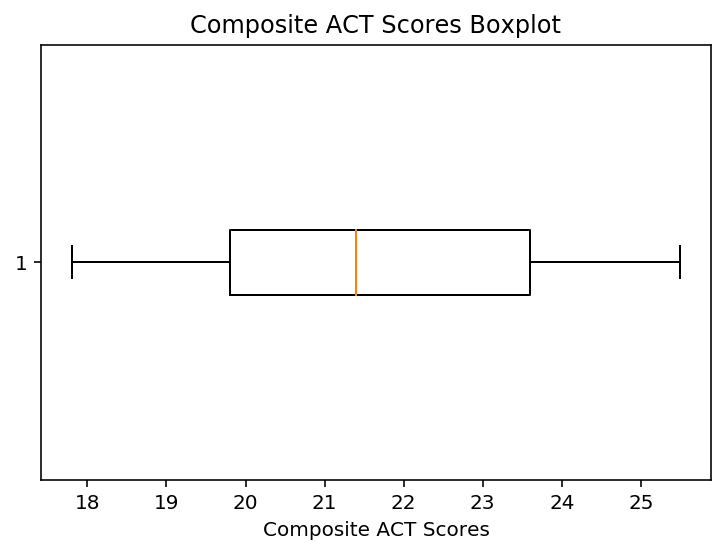

In [51]:
plt.boxplot(SAT_ACT['Composite_ACT'][0:50], vert=False, whis=10.0, autorange=True)
plt.xlabel('Composite ACT Scores')
plt.title('Composite ACT Scores Boxplot')
plt.show

<function matplotlib.pyplot.show>

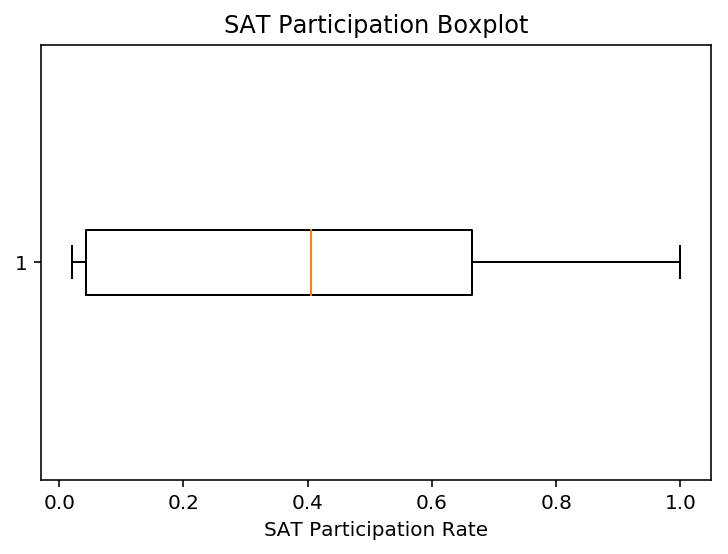

In [52]:
plt.boxplot(SAT_ACT['Participation_SAT'][0:50], vert=False, whis=10.0, autorange=True)
plt.xlabel('SAT Participation Rate')
plt.title('SAT Participation Boxplot')
plt.show

<function matplotlib.pyplot.show>

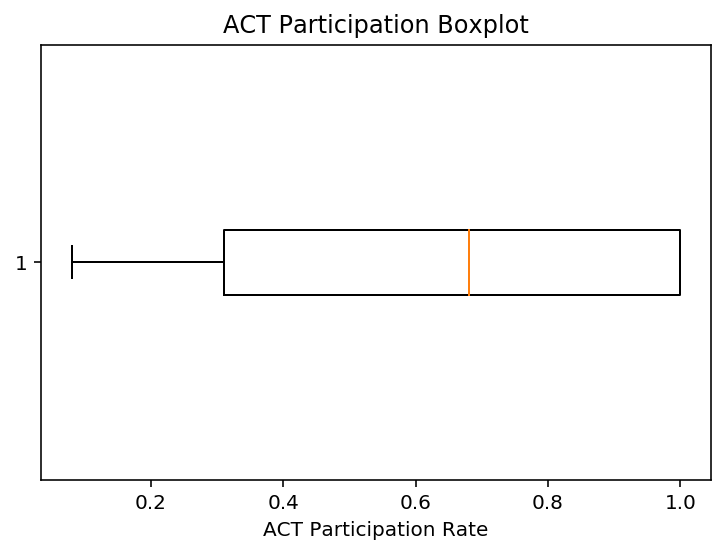

In [53]:
plt.boxplot(SAT_ACT['Participation_ACT'][0:50],vert=False, whis=10.0, autorange=True)
plt.xlabel('ACT Participation Rate')
plt.title('ACT Participation Boxplot')
plt.show

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

For the SAT Participation distribution, the median and mean are very similar with a value of 0.405. This should mean the distribution is normally distributed. The histogram for SAT population shows otherwise. It shows a skewed distribution to the right with more values on the lower end. The abundance of lower participation rates reveal that they don't contribute much to the mean of the distribution. The standard deviation of the distribution is 0.35. Considering participation is measured between 0 and 1, the spread of the distribution is quite large. Also it shows that more values are further from the mean. 

For the ACT Participation distribution, the median and mean are relatively similar at 0.680 and 0.646 respectively. Based on the fact that median is greater than the mean, it should indicate a slghtly left skewed distribution. This is supported by the histogram for ACT Participation. For the spread of the SAT Participation distribution, the same can be applied for the ACT Participation distribution with a large standard deviation. It also shows that more values are further from the mean.

For the SAT Math Score distribution, the mean and median are relatively similar at 546.5 and 544.5 respectively. Based on the fact they are relatively similar, the distribution should be normally distributed. The histogram shows more of a left skewed distribution. It seems that way because of the outlier of a score of 49. If that outlier was removed from this series, the distribution would look normal. The standard deviation shows that more values are closer to the mean. 

For the ACT Math Score distribution, the mean is 21.050 and the median is 21.21. This should show that the distribution is normally distributed because the two values are almost identical. The historgram may not seem to show that it is normally distributed, so we need to look at standard deviation. It is 1.96 for this distribution. That should indicate that more values are closer than the mean.

For the SAT Verbal Score distribution, the mean is 558.5 and the median is 567.98. The median is larger than the mean, which reveals that this distribution should show a slightly left skewed distribution. The histogram roughly reveals a slightly left skewed distribution, or even a normal distribution as the mean and median aren't far off from each other. The standard deviation is 45.217. This shows more values are closer to the mean and a more tightly packed distribution. 

For the ACT Verbal Score distribution, the median is 21.850 and the mean is 22.038. With the mean and median being pretty similar, the distribution should be normally distributed. The histogram should roughly support that conclusion. The spread of the distribution, according to a standard deviation value of 2.05, should reveal a more tightly packed distribution and that more values are close to the mean. 

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

The relationship between the participation rate of the SAT and the ACT test show a strong negative correlation. This is supported by a calculated correlation coeffficient of -.841. As SAT participation goes up, ACT participation goes down and vice versa. This obviously does not imply causation. It could just be a matter of coincience or even by chance. 

The relationship between the Total SAT Scores and the Composite ACT scores show a weak negative correlation. This is supported by a calculated correlation coefficient of -0.445. This relationship could be a bit stronger if they were both averages instead of one being a total and the other being an average. 

The relationship between the participation rate of the SAT test and the total SAT score shows a strong negative correlation. This is supported by a calculated correlation coefficient of -.868. This is strange as it shows that as participation rate increases, the total SAT score decreases. It could be a matter of coincidence or by chance. More granular data could shed more light on this. 

The relationship between the participation rate of the ACT test and the composite ACT score shows a weak negative correlation. This is supported by a calculated correlated cofficient of -.488.  Unlike for the relationship between the SAT score and participation, this shows that the relationship is relatively weak. 

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [54]:
SAT_pat_mean = np.mean(SAT_ACT['Participation_SAT'])
ACT_pat_mean = np.mean(SAT_ACT['Participation_ACT'])
SAT_pat_mean

0.39803921568627454

In [55]:
ACT_pat_mean

0.6525490196078431

In [56]:
sat_data = SAT_ACT['Participation_SAT'][0:50]
act_data = SAT_ACT['Participation_ACT'][0:50] ##in order to pull the data excluding the standard deviation row

Null hypothesis: The two population means are equal.
Alternative hypothesis: The two population means are not equal. 

We want to use a two-sample t-test in this situation. 

In [57]:
stats.ttest_ind(sat_data, act_data)

Ttest_indResult(statistic=-3.564388823190614, pvalue=0.00056555701630353074)

Conclusion: Because p is less than alpha, we fail to reject the null hypothesis and can conclude that the alternative hypothesis that the two population means are not equal is true. 

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [58]:
#ACT

sample_mean = ACT_pat_mean
z_star = 1.96
sigma = 0.318
n = len(SAT_ACT['Participation_ACT'][0:50])

low_end_act = sample_mean - z_star * sigma / n ** 0.5

high_end_act = sample_mean + z_star * sigma / n ** 0.5
low_end_act

0.5644039166922528

In [59]:
high_end_act

0.7406941225234334

Conclusion: We are 95% confident that the true mean of ACT test participation falls is between 0.56 and 0.74.

In [60]:
#SAT

sample_mean = SAT_pat_mean
z_star = 1.96
sigma = 0.349
n = len(SAT_ACT['Participation_SAT'][0:50])

low_end_sat = sample_mean - z_star * sigma / n ** 0.5

high_end_sat = sample_mean + z_star * sigma / n ** 0.5
low_end_sat

0.30130135116570533

In [61]:
high_end_sat

0.49477708020684374

Conclusion: We are 95% confident that the true mean of SAT test participation falls is between 0.30 and 0.49.

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No, because the hypothesis test shows that the difference between population means of both participation rates is statistically significant. The 95% confidence intervals for the means don’t overlap, which shows a significant difference between the means of the participation rates. 

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

In [62]:
np.corrcoef(SAT_ACT['Math_SAT'],SAT_ACT['Math_ACT']) ##just to see the correlation of this relationship

array([[ 1.       , -0.3409059],
       [-0.3409059,  1.       ]])

Yes, since correlation is a unitless number, variables of differing units can be compared based on correlation.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

It depends. If you are calculating how strong the relationship between the two data sets, you are certainly able to describe the relationship. But you can't really make a statistical inference from that data. If you are comparing the average scores of both tests and to check and see if they are statistically different, you certainly can. Conducting a statistical inference based on purely face value, it wouldn't make much sense. They are scored differently, they have different sections, and high school students have a choice of taking either test to be granted admission to college. 